In [2]:
import numpy as np# Importing every library we need

In [3]:
import seaborn as sns

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("data0.csv")

In [6]:
df.head()

,Market Place,Crop Variety,Producer Min,Producer Max,Wholesale Min,Wholesale Max,Retail Min,Retail Max,Volume,Collection Date
0,Bahir Dar kebele 04,White Teff (Quintal),0,0.0,2400,2500,2550.0,2650,Sufficient,5/2/2019
1,Debre Markos Huseta Gebeya,White Teff (Quintal),2450,2500.0,0,0,2500.0,2550,Sufficient,5/4/2019
2,Aksum,White Teff (Quintal),2837,2837.0,0,0,0.0,0,Under,5/4/2019
3,Hawassa,White Teff (Quintal),0,0.0,2700,2900,2800.0,3000,Under,5/6/2019
4,Bahir Dar kebele 04,White Teff (Quintal),0,0.0,2450,2550,2550.0,2700,Sufficient,5/9/2019


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2964 entries, 0 to 2963
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Market Place     2964 non-null   object 
 1   Crop Variety     2964 non-null   object 
 2   Producer Min     2964 non-null   int64  
 3   Producer Max     2964 non-null   float64
 4   Wholesale Min    2964 non-null   int64  
 5   Wholesale Max    2964 non-null   int64  
 6   Retail Min       2964 non-null   float64
 7   Retail Max       2964 non-null   int64  
 8   Volume           2964 non-null   object 
 9   Collection Date  2964 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 231.7+ KB


In [8]:
df.dropna(inplace = True)

In [9]:
df.isnull().sum()

Market Place       0
Crop Variety       0
Producer Min       0
Producer Max       0
Wholesale Min      0
Wholesale Max      0
Retail Min         0
Retail Max         0
Volume             0
Collection Date    0
dtype: int64

In [10]:
data2=df.copy()

In [11]:
data2 = data2.dropna()

In [12]:
data2.isnull().sum()

Market Place       0
Crop Variety       0
Producer Min       0
Producer Max       0
Wholesale Min      0
Wholesale Max      0
Retail Min         0
Retail Max         0
Volume             0
Collection Date    0
dtype: int64

In [13]:
data2 = data2.drop(columns='Retail Min')# multiple in one (['f','h])

In [14]:
data2 = data2.drop(columns='Wholesale Max')

In [15]:
data2 = data2.drop(columns='Wholesale Min')

In [16]:
data2 = data2.drop(columns='Producer Max')

In [17]:
data2 = data2.drop(columns='Producer Min')

In [18]:
data2.head()

,Market Place,Crop Variety,Retail Max,Volume,Collection Date
0,Bahir Dar kebele 04,White Teff (Quintal),2650,Sufficient,5/2/2019
1,Debre Markos Huseta Gebeya,White Teff (Quintal),2550,Sufficient,5/4/2019
2,Aksum,White Teff (Quintal),0,Under,5/4/2019
3,Hawassa,White Teff (Quintal),3000,Under,5/6/2019
4,Bahir Dar kebele 04,White Teff (Quintal),2700,Sufficient,5/9/2019


In [19]:
data2["Collection Date"][4]

'5/9/2019'

In [20]:
data2["Collection Date"].value_counts()

Collection Date
1/29/2022     35
10/27/2022    14
1/28/2023      8
5/21/2022      8
2/1/2020       8
              ..
6/24/2020      1
6/23/2020      1
6/13/2022      1
6/9/2020       1
5/2/2019       1
Name: count, Length: 909, dtype: int64

In [21]:
str = data2["Collection Date"][1]#taking any arbitrary data spliting it by calling split methode
str2 = str.split()#spliting it to 5,/,1,/,2019   thus str[6] out of range 
print(str)
print(str2)
print(str[0])

5/4/2019
['5/4/2019']
5


In [22]:
#creating dictionary to store the months in
Dict = {1 :"January", 2:"February", 3:"March", 4:"April", 5:"May", 6:"June", 7:"July", 8:"August", 9:"September", 10:"October", 11:"November", 12:"December"}
print(Dict)

{1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}


In [23]:
Dict[3]

'March'

In [24]:
month = []#creating empty column

In [25]:
for rr in data2["Collection Date"]:
    str = rr
    str2 = str.split('/')
    month.append(Dict[int(str2[0])])#taking the first term, (month) from the splited

In [26]:
len(month)

2964

In [27]:
data2["month"] = month

In [28]:
data2["month"]

0           May
1           May
2           May
3           May
4           May
         ...   
2959    January
2960    January
2961    January
2962    January
2963    January
Name: month, Length: 2964, dtype: object

In [29]:
data2["month"].unique()

array(['May', 'June', 'July', 'August', 'September', 'October',
       'November', 'December', 'January', 'February', 'March', 'April'],
      dtype=object)

In [30]:
season =[]#creating empty column of season

In [31]:
for tt in data2["month"]:
    if tt== "December" or tt=="January" or tt=="February":
        season.append("Winter")
    elif tt=="March" or tt=="April" or tt== "May":
            season.append("Autumn")
    elif tt=="June" or tt=="July" or tt == "August":
            season.append("Summer")
    elif tt=="September" or tt=="October" or tt== "November":
            season.append("Spring")

In [32]:
len(season)

2964

In [33]:
data2["season"] = season

In [34]:
data2["season"]

0       Autumn
1       Autumn
2       Autumn
3       Autumn
4       Autumn
         ...  
2959    Winter
2960    Winter
2961    Winter
2962    Winter
2963    Winter
Name: season, Length: 2964, dtype: object

In [35]:
import pandas as pd 
df = pd.Timestamp("5/3/2023")
print(df.dayofweek)# will give each day like 0 = monday, 1=tuesday....

2


In [36]:
day_of_week = []

In [37]:
for rr in data2["Collection Date"]:#finding out value of each date and craating day column
    str = rr
    df = pd.Timestamp(rr)
    day = df.dayofweek
    day_of_week.append(day)

In [38]:
len(day_of_week)

2964

In [39]:
data2["day"]=day_of_week # putting the created day column to the data

In [40]:
data2.head()

,Market Place,Crop Variety,Retail Max,Volume,Collection Date,month,season,day
0,Bahir Dar kebele 04,White Teff (Quintal),2650,Sufficient,5/2/2019,May,Autumn,3
1,Debre Markos Huseta Gebeya,White Teff (Quintal),2550,Sufficient,5/4/2019,May,Autumn,5
2,Aksum,White Teff (Quintal),0,Under,5/4/2019,May,Autumn,5
3,Hawassa,White Teff (Quintal),3000,Under,5/6/2019,May,Autumn,0
4,Bahir Dar kebele 04,White Teff (Quintal),2700,Sufficient,5/9/2019,May,Autumn,3


In [41]:
data1 = data2.copy()

In [42]:
data2 = data2.drop(columns='Collection Date') #delating the column collection date not necessary any more

In [43]:
data2.head()

,Market Place,Crop Variety,Retail Max,Volume,month,season,day
0,Bahir Dar kebele 04,White Teff (Quintal),2650,Sufficient,May,Autumn,3
1,Debre Markos Huseta Gebeya,White Teff (Quintal),2550,Sufficient,May,Autumn,5
2,Aksum,White Teff (Quintal),0,Under,May,Autumn,5
3,Hawassa,White Teff (Quintal),3000,Under,May,Autumn,0
4,Bahir Dar kebele 04,White Teff (Quintal),2700,Sufficient,May,Autumn,3


<Axes: >

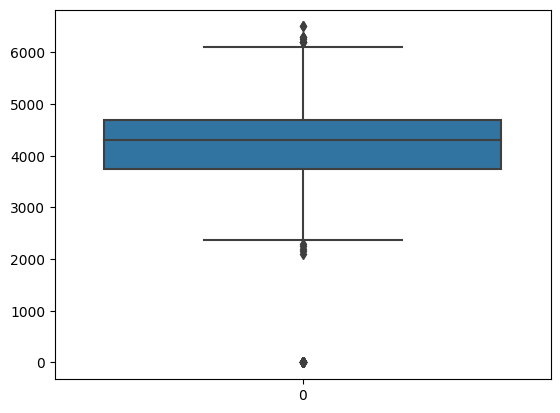

In [44]:
import seaborn as sns
sns.boxplot(data2['Retail Max'])# look if there are out layers and remove them

# Removing out layers of Retail Max price 25%<values<75% out of this range

In [45]:
#IQR
Q1=np.percentile(data2['Retail Max'], 25,interpolation="midpoint")
Q3=np.percentile(data2['Retail Max'], 75,interpolation="midpoint")
IQR=Q3-Q1

C:\Users\user\AppData\Local\Temp\ipykernel_10912\2964940248.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1=np.percentile(data2['Retail Max'], 25,interpolation="midpoint")
C:\Users\user\AppData\Local\Temp\ipykernel_10912\2964940248.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3=np.percentile(data2['Retail Max'], 75,interpolation="midpoint")


In [46]:
#Upper bound
upper=np.where(data2['Retail Max']>=(Q3+1.5*IQR))
#Lower bound
lower=np.where(data2['Retail Max']<=(Q1-1.5*IQR))


In [47]:
print(upper[0],lower[0])

[2854 2901 2910 2923 2926 2943 2945 2949 2952] [   2    6    9   11   16   22   27   29   34   37   42   49   55   62
   67   74   75   84   90   93   98  103  109  113  119  124  141  209
  228  246  265  300 1086 2243 2291 2308 2325 2345 2399 2413 2448 2461
 2478 2496 2517 2865 2866 2888 2902 2925]


In [48]:
#...Removing the outliers...
data2.drop(upper[0], inplace=True)
data2.drop(lower[0], inplace=True)

print("New Shape: ", data2.shape)

New Shape:  (2905, 7)


<Axes: >

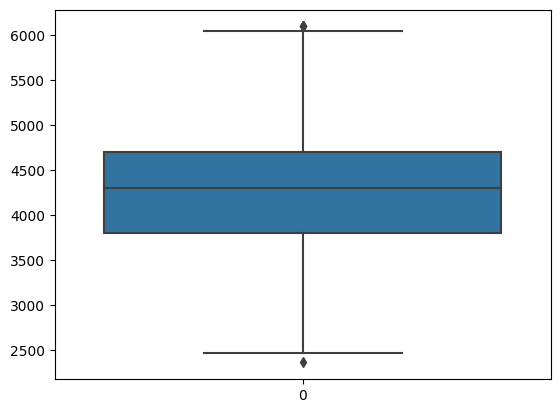

In [49]:
sns.boxplot(data2['Retail Max'])

# Graphical Analysis

<IPython.core.display.Javascript object>

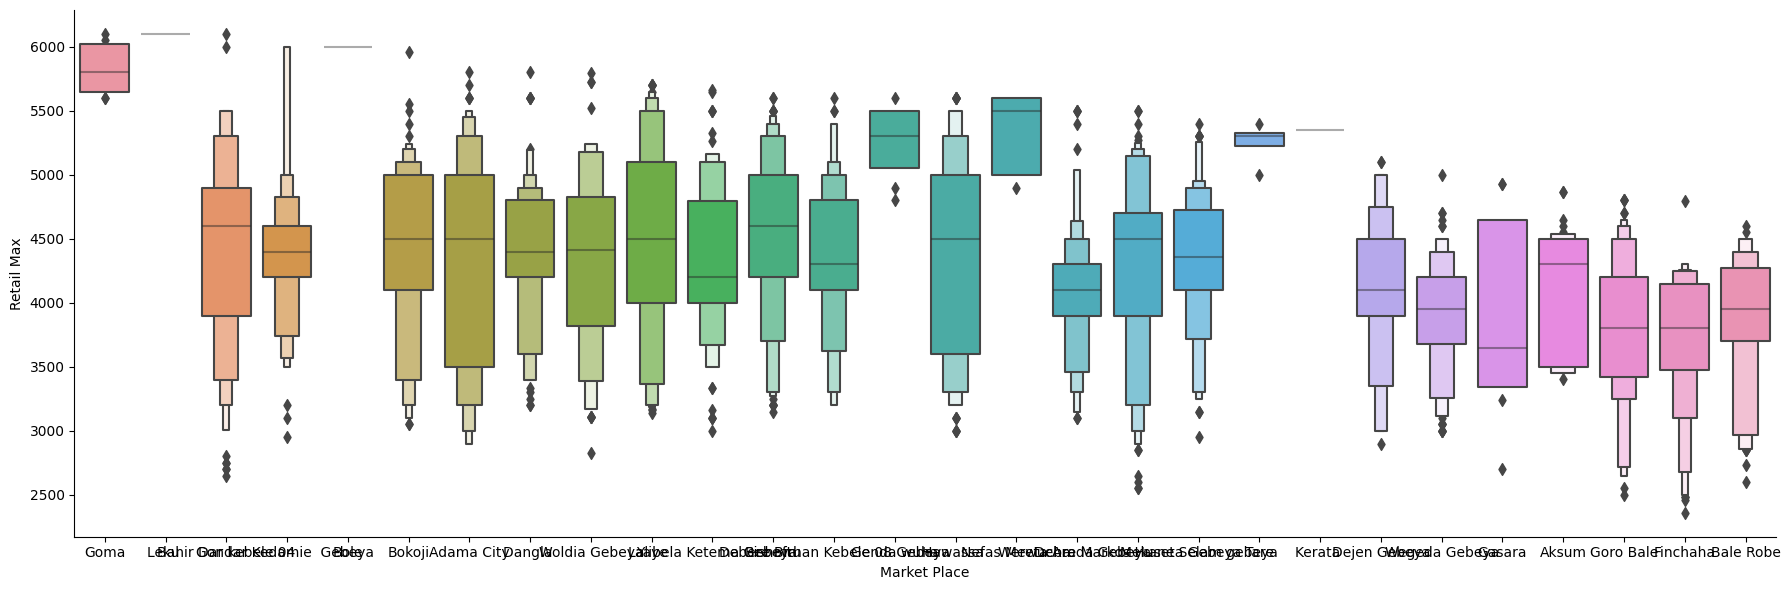

In [50]:
# market place  vs retail max
sns.catplot(y = "Retail Max", x = "Market Place", data = data2.sort_values("Retail Max", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

<IPython.core.display.Javascript object>

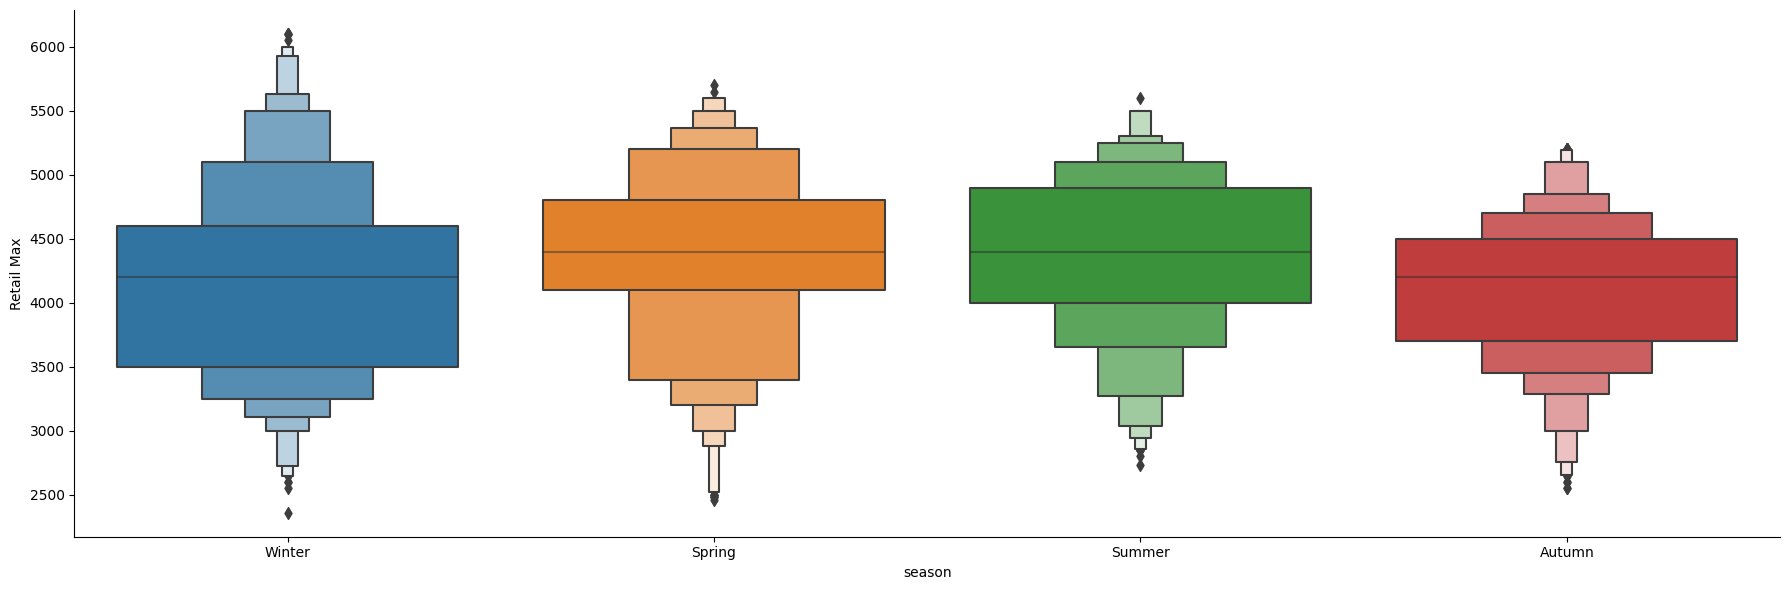

In [51]:
# market place  vs retail max
sns.catplot(y = "Retail Max", x = "season", data = data2.sort_values("Retail Max", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

<IPython.core.display.Javascript object>

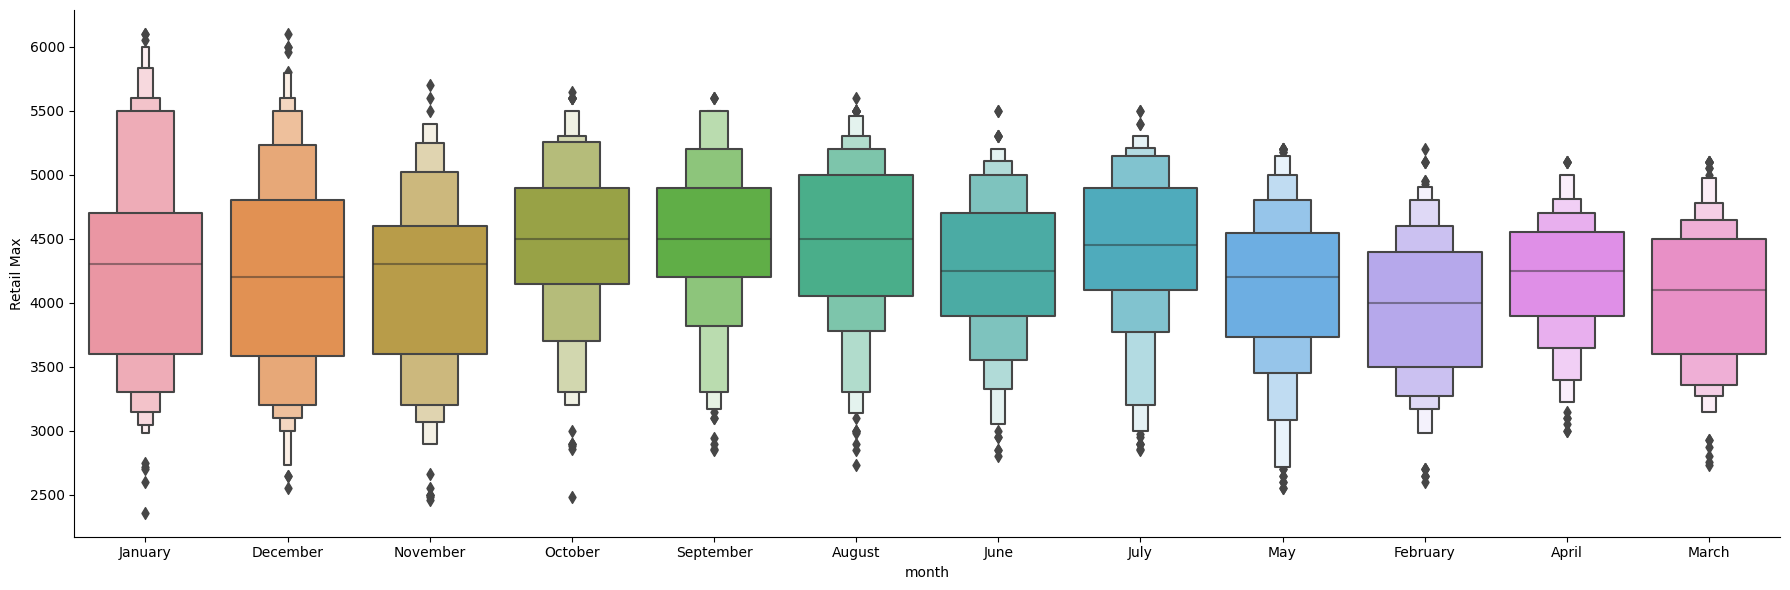

In [52]:
# market place  vs retail max
sns.catplot(y = "Retail Max", x = "month", data = data2.sort_values("Retail Max", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

<IPython.core.display.Javascript object>

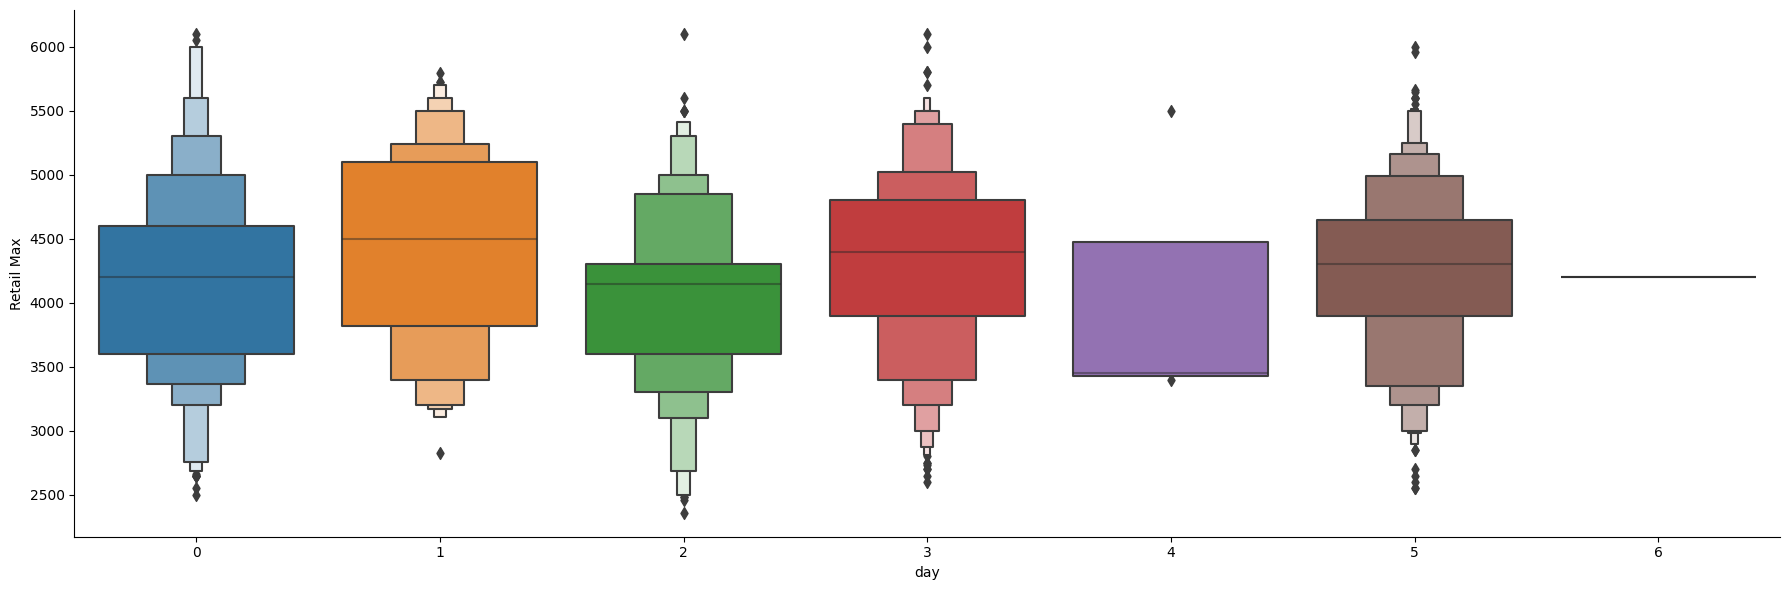

In [53]:
# market place  vs retail max
sns.catplot(y = "Retail Max", x = "day", data = data2.sort_values("Retail Max", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

<IPython.core.display.Javascript object>

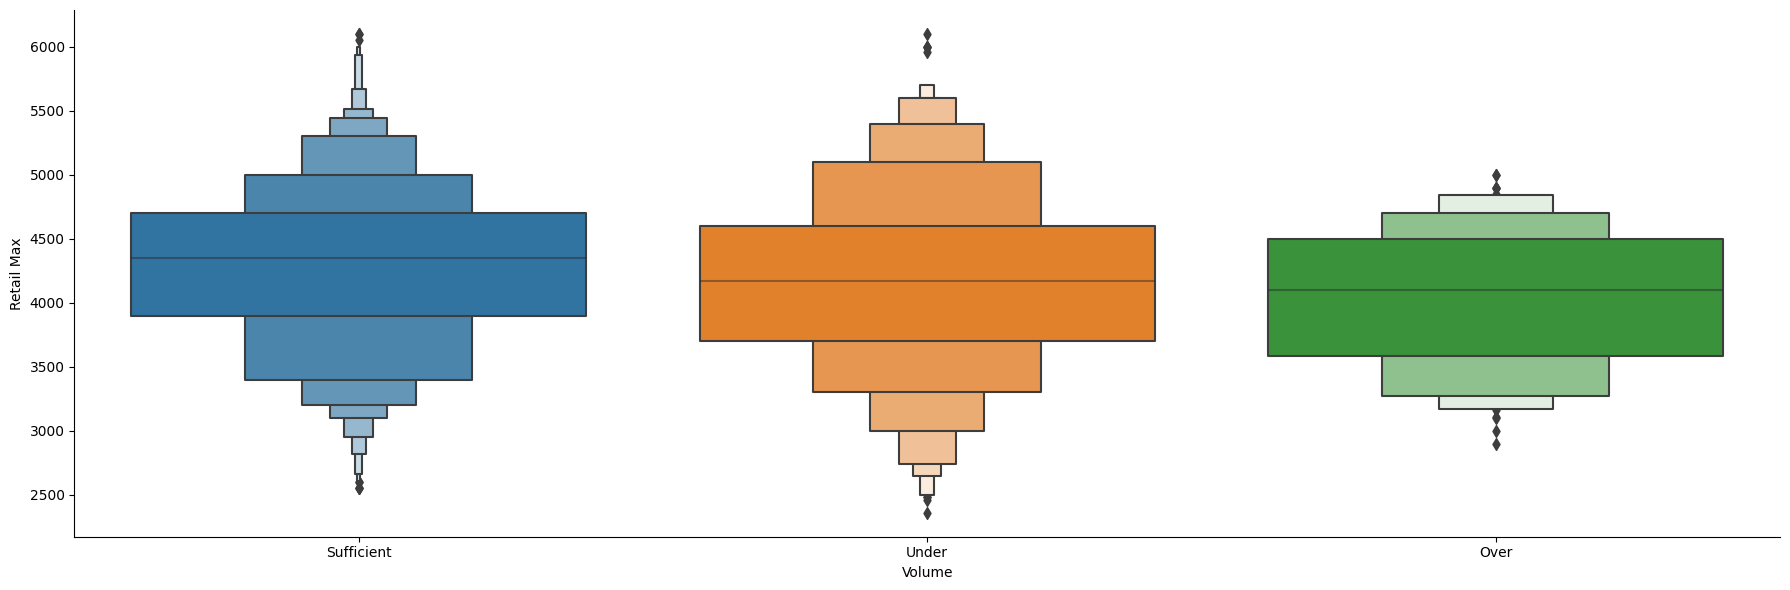

In [54]:
# market place  vs retail max
sns.catplot(y = "Retail Max", x = "Volume", data = data2.sort_values("Retail Max", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [55]:
data2.head()

,Market Place,Crop Variety,Retail Max,Volume,month,season,day
0,Bahir Dar kebele 04,White Teff (Quintal),2650,Sufficient,May,Autumn,3
1,Debre Markos Huseta Gebeya,White Teff (Quintal),2550,Sufficient,May,Autumn,5
3,Hawassa,White Teff (Quintal),3000,Under,May,Autumn,0
4,Bahir Dar kebele 04,White Teff (Quintal),2700,Sufficient,May,Autumn,3
5,Debre Markos Huseta Gebeya,White Teff (Quintal),2550,Sufficient,May,Autumn,5


In [56]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2905 entries, 0 to 2963
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Market Place  2905 non-null   object
 1   Crop Variety  2905 non-null   object
 2   Retail Max    2905 non-null   int64 
 3   Volume        2905 non-null   object
 4   month         2905 non-null   object
 5   season        2905 non-null   object
 6   day           2905 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 246.1+ KB


# Changing the object data types in to numeric values using oneHotEncoding technique

In [57]:
# As market place is Nominal Categorical data we will perform OneHotEncoding

Market_Place = data2[["Market Place"]]

Market_Place = pd.get_dummies(Market_Place, drop_first= True)

Market_Place.head()

,Market Place_Aksum,Market Place_Bahir Dar kebele 04,Market Place_Bale Robe,Market Place_Bishoftu,Market Place_Bokoji,Market Place_Bole,Market Place_Dangla,Market Place_Debere Birhan Kebele 08 Gebeya,Market Place_Debre Markos Huseta Gebeya,Market Place_Dejen Gebeya,...,Market Place_Kerata,Market Place_Lalibela Ketema Gebeya,Market Place_Leku,Market Place_Mekane Selam gebeya,Market Place_Nefas Mewucha,Market Place_Tare,Market Place_Wegeda Gebeya,Market Place_Wereta Arada Gebeya,Market Place_Woldia Gebeya,Market Place_Yaye
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [58]:
# As crop variety is Nominal Categorical data we will perform OneHotEncoding

Crop_Variety = data2[["Crop Variety"]]

Crop_Variety = pd.get_dummies(Crop_Variety, drop_first= True)

Crop_Variety.head()

""
0
1
3
4
5


In [59]:
# As volume is Nominal Categorical data we will perform OneHotEncoding

Volume = data2[["Volume"]]

Volume = pd.get_dummies(Volume, drop_first= True)

Volume.head()

,Volume_Sufficient,Volume_Under
0,True,False
1,True,False
3,False,True
4,True,False
5,True,False


In [60]:
# As season is Nominal Categorical data we will perform OneHotEncoding

season = data2[["season"]]

season = pd.get_dummies(season, drop_first= True)

season.head(10)# the rest for the upsent == autumn

,season_Spring,season_Summer,season_Winter
0,False,False,False
1,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
7,False,False,False
8,False,False,False
10,False,False,False
12,False,False,False
13,False,False,False


In [61]:
# As month is Nominal Categorical data we will perform OneHotEncoding

month = data2[["month"]]

month = pd.get_dummies(month, drop_first= True)

month.head()# 

,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,True,False,False,False
5,False,False,False,False,False,False,False,True,False,False,False


In [62]:
data0 = data2.copy()

#concatenation of the columns to the data

In [63]:
data = pd.concat([data2, Market_Place, Crop_Variety, Volume, season, month ], axis = 1)

In [64]:
data.head()

,Market Place,Crop Variety,Retail Max,Volume,month,season,day,Market Place_Aksum,Market Place_Bahir Dar kebele 04,Market Place_Bale Robe,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,Bahir Dar kebele 04,White Teff (Quintal),2650,Sufficient,May,Autumn,3,False,True,False,...,False,False,False,False,False,False,True,False,False,False
1,Debre Markos Huseta Gebeya,White Teff (Quintal),2550,Sufficient,May,Autumn,5,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,Hawassa,White Teff (Quintal),3000,Under,May,Autumn,0,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,Bahir Dar kebele 04,White Teff (Quintal),2700,Sufficient,May,Autumn,3,False,True,False,...,False,False,False,False,False,False,True,False,False,False
5,Debre Markos Huseta Gebeya,White Teff (Quintal),2550,Sufficient,May,Autumn,5,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [65]:
datas = data.copy()

# delating the oneHotEncoded columns

In [66]:
data.drop(["Market Place", "Crop Variety", "Volume", "season", "month"], axis = 1, inplace = True)

In [67]:
data.head()

,Retail Max,day,Market Place_Aksum,Market Place_Bahir Dar kebele 04,Market Place_Bale Robe,Market Place_Bishoftu,Market Place_Bokoji,Market Place_Bole,Market Place_Dangla,Market Place_Debere Birhan Kebele 08 Gebeya,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,2650,3,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,2550,5,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,3000,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,2700,3,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
5,2550,5,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


# splitting the data in  to train and test data 

In [68]:
data.columns

Index(['Retail Max', 'day', 'Market Place_Aksum',
       'Market Place_Bahir Dar kebele 04', 'Market Place_Bale Robe',
       'Market Place_Bishoftu', 'Market Place_Bokoji', 'Market Place_Bole',
       'Market Place_Dangla ', 'Market Place_Debere Birhan Kebele 08 Gebeya',
       'Market Place_Debre Markos Huseta Gebeya', 'Market Place_Dejen Gebeya',
       'Market Place_Finchaha', 'Market Place_Gasara',
       'Market Place_Genda wuha', 'Market Place_Goma',
       'Market Place_Gondar Kedamie  Gebeya ', 'Market Place_Goro Bale',
       'Market Place_Hawassa ', 'Market Place_Kerata ',
       'Market Place_Lalibela Ketema Gebeya', 'Market Place_Leku ',
       'Market Place_Mekane Selam gebeya', 'Market Place_Nefas Mewucha',
       'Market Place_Tare', 'Market Place_Wegeda Gebeya',
       'Market Place_Wereta Arada Gebeya ', 'Market Place_Woldia Gebeya',
       'Market Place_Yaye', 'Volume_Sufficient', 'Volume_Under',
       'season_Spring', 'season_Summer', 'season_Winter', 'month_August

In [71]:
features = data.loc[:,[  'day', 'Market Place_Aksum',
       'Market Place_Bahir Dar kebele 04', 'Market Place_Bale Robe',
       'Market Place_Bishoftu', 'Market Place_Bokoji', 'Market Place_Bole',
       'Market Place_Dangla ', 'Market Place_Debere Birhan Kebele 08 Gebeya',
       'Market Place_Debre Markos Huseta Gebeya', 'Market Place_Dejen Gebeya',
       'Market Place_Finchaha', 'Market Place_Gasara',
       'Market Place_Genda wuha', 'Market Place_Goma',
       'Market Place_Gondar Kedamie  Gebeya ', 'Market Place_Goro Bale',
       'Market Place_Hawassa ', 'Market Place_Kerata ',
       'Market Place_Lalibela Ketema Gebeya', 'Market Place_Leku ',
       'Market Place_Mekane Selam gebeya', 'Market Place_Nefas Mewucha',
       'Market Place_Tare', 'Market Place_Wegeda Gebeya',
       'Market Place_Wereta Arada Gebeya ', 'Market Place_Woldia Gebeya',
       'Market Place_Yaye', 'Volume_Sufficient', 'Volume_Under',
       'season_Spring', 'season_Summer', 'season_Winter', 'month_August',
       'month_December', 'month_February', 'month_January', 'month_July',
       'month_June', 'month_March', 'month_May', 'month_November',
       'month_October', 'month_September']]

In [72]:
features.head()

,day,Market Place_Aksum,Market Place_Bahir Dar kebele 04,Market Place_Bale Robe,Market Place_Bishoftu,Market Place_Bokoji,Market Place_Bole,Market Place_Dangla,Market Place_Debere Birhan Kebele 08 Gebeya,Market Place_Debre Markos Huseta Gebeya,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,3,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,5,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
3,0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,3,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
5,5,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False


In [73]:
labels = data.loc[:,'Retail Max']

In [74]:
labels.head()

0    2650
1    2550
3    3000
4    2700
5    2550
Name: Retail Max, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

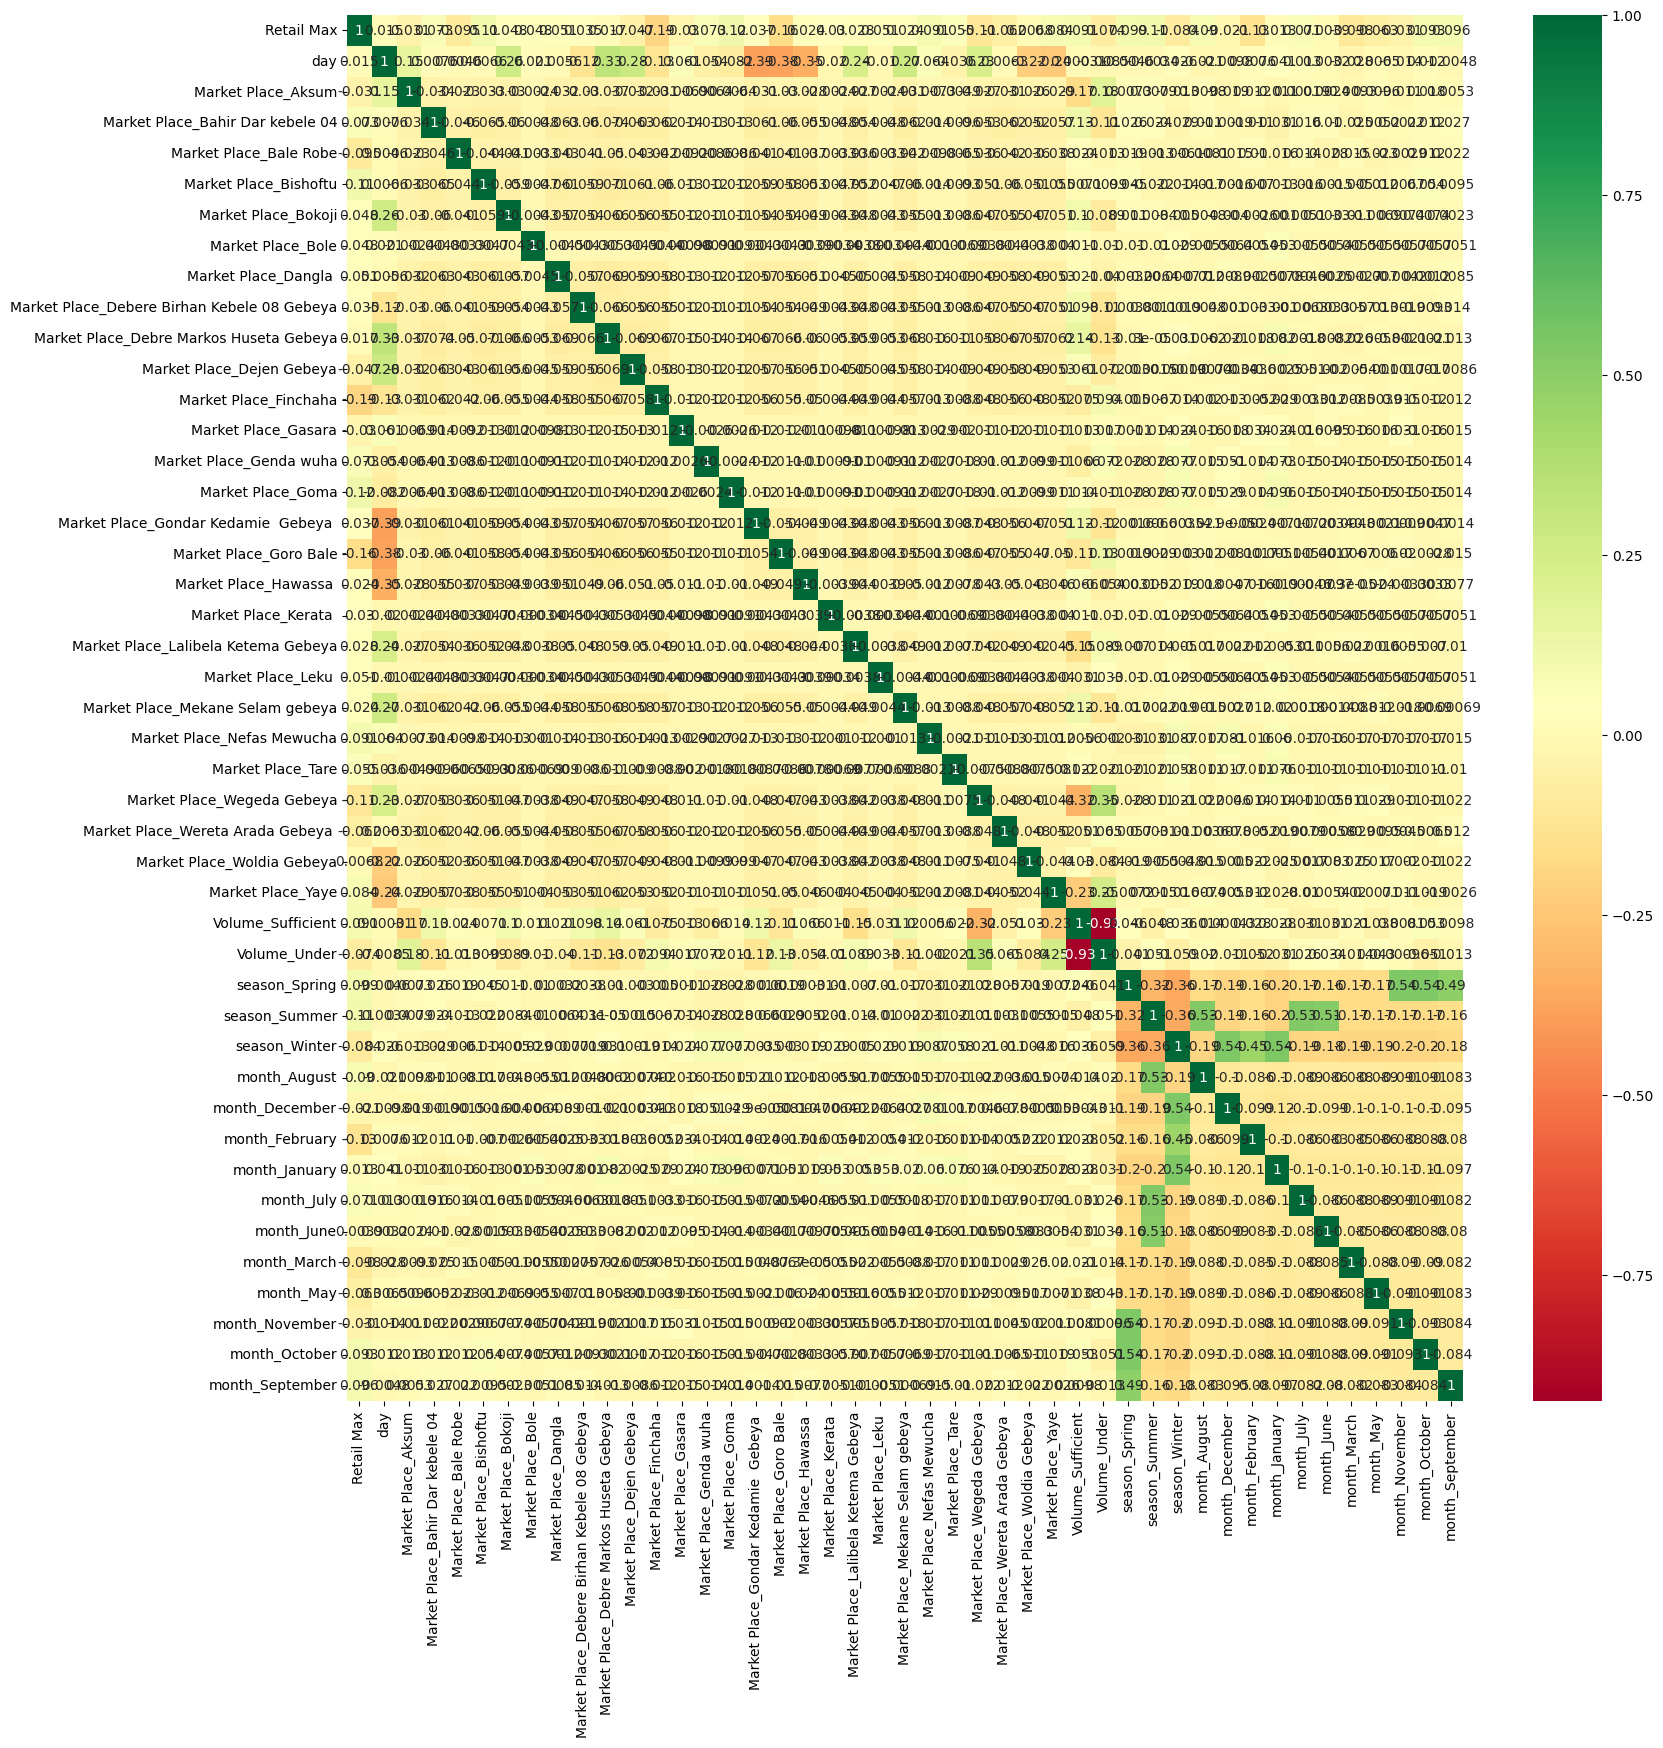

In [75]:
#
plt.figure(figsize = (18,18))
sns.heatmap(data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [76]:
!pip install scikit-learn


[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [77]:
from sklearn.model_selection import train_test_split

In [78]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features, labels, test_size=0.2, random_state=2)

In [79]:
len(Xtrain)# 80 percent of 934 data == 747 and 20 percent 187

2324

In [80]:
len(Ytrain)

2324

In [81]:
len(Xtest)

581

In [82]:
len(Ytest)

581

In [83]:
from sklearn.metrics import ConfusionMatrixDisplay

In [84]:
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score,f1_score, roc_auc_score, roc_curve

In [85]:
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

In [86]:
#model =DecisionTreeClassifier
model = LinearRegression()
#model = LogisticRegression()

In [87]:
model.fit(Xtrain, Ytrain)

LinearRegression()

In [88]:
ypred = model.predict(Xtest)
ypred

array([4.62129259e+03, 4.62838193e+03, 3.48179259e+03, 4.30091890e+03,
       4.63835400e+03, 4.47079259e+03, 4.50834614e+03, 3.83742358e+03,
       4.34691890e+03, 4.50069723e+03, 4.63835400e+03, 3.67041995e+03,
       4.60202310e+03, 4.50834614e+03, 3.99079259e+03, 3.73641759e+03,
       4.32284614e+03, 4.22479675e+03, 3.89721924e+03, 4.70812966e+03,
       4.32284614e+03, 4.36329259e+03, 4.20987963e+03, 3.99332924e+03,
       4.20511978e+03, 3.71929259e+03, 4.48854259e+03, 4.20407073e+03,
       3.97954259e+03, 4.10915062e+03, 4.46079259e+03, 4.32329259e+03,
       4.37169723e+03, 3.60016476e+03, 4.71557332e+03, 4.47253427e+03,
       4.38829259e+03, 4.64547026e+03, 4.27639244e+03, 3.88342358e+03,
       4.68979259e+03, 4.27317876e+03, 3.67249767e+03, 4.10915062e+03,
       3.93820241e+03, 4.53201191e+03, 4.55977310e+03, 3.80329259e+03,
       4.20770842e+03, 4.47253427e+03, 4.15505565e+03, 4.34029259e+03,
       4.15179259e+03, 4.29869240e+03, 4.32179709e+03, 4.29850440e+03,
      

In [89]:
Ytest

898     4400
2656    5160
2133    4927
1147    4100
1637    4800
        ... 
1229    4050
2830    5700
262     3105
2366    5100
2576    5300
Name: Retail Max, Length: 581, dtype: int64

In [90]:
model.score(Xtrain,Ytrain)

0.22301194819657832

In [91]:
model.score(Xtest,Ytest)

-2.0077859541538603e+20

C:\Users\user\AppData\Local\Temp\ipykernel_10912\2343581898.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Ytest-ypred)


<IPython.core.display.Javascript object>

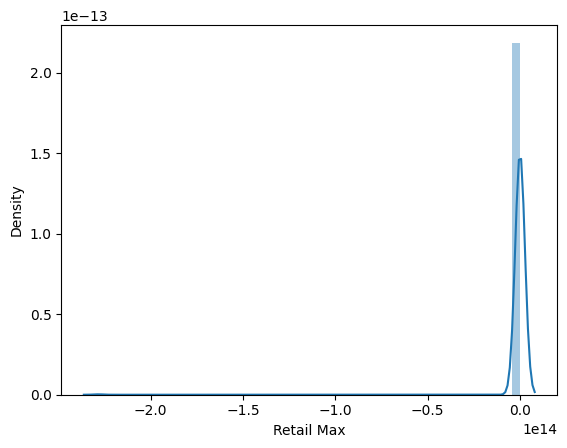

In [92]:
sns.distplot(Ytest-ypred)
plt.show()

In [93]:
metrics.r2_score(Ytest,ypred)

<IPython.core.display.Javascript object>

-2.0077859541538603e+20